<a href="https://colab.research.google.com/github/arijdavis/CAP4630/blob/master/Hw2/Hw2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

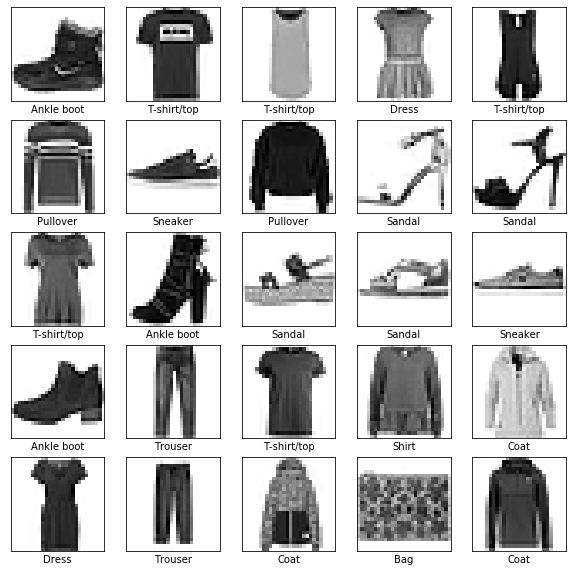

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

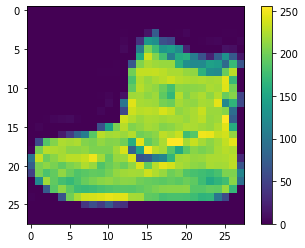

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5024 - acc: 0.8223 - val_loss: 0.4364 - val_acc: 0.8455
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3771 - acc: 0.8650 - val_loss: 0.3911 - val_acc: 0.8587
Epoch 3/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3386 - acc: 0.8758 - val_loss: 0.4216 - val_acc: 0.8427
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3159 - acc: 0.8840 - val_loss: 0.3695 - val_acc: 0.8669
Epoch 5/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2965 - acc: 0.8898 - val_loss: 0.3752 - val_acc: 0.8631
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2820 - acc: 0.8952 - val_loss: 0.3340 - val_acc: 0.8800
Epoch 7/20
60000/60000 [===========

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3560 - acc: 0.8875
Test accuracy: 0.8875


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

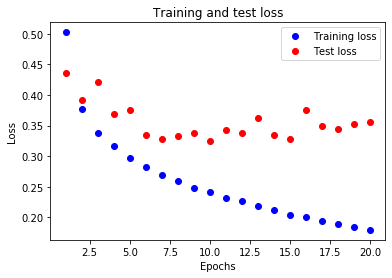

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

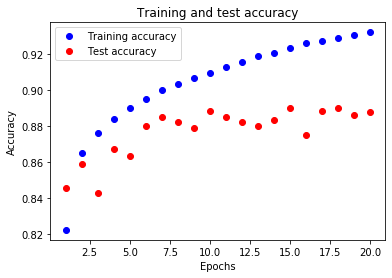

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

array([4.1182495e-11, 6.5083850e-14, 3.9689061e-11, 1.8729621e-12,
       2.0693152e-13, 5.1235889e-05, 5.2062514e-08, 4.4544920e-02,
       6.4616893e-07, 9.5540309e-01], dtype=float32)

In [0]:
np.argmax(predictions[index])

9

In [0]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

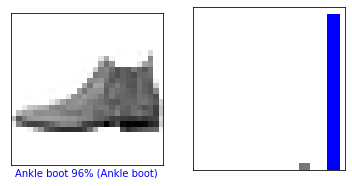

In [0]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


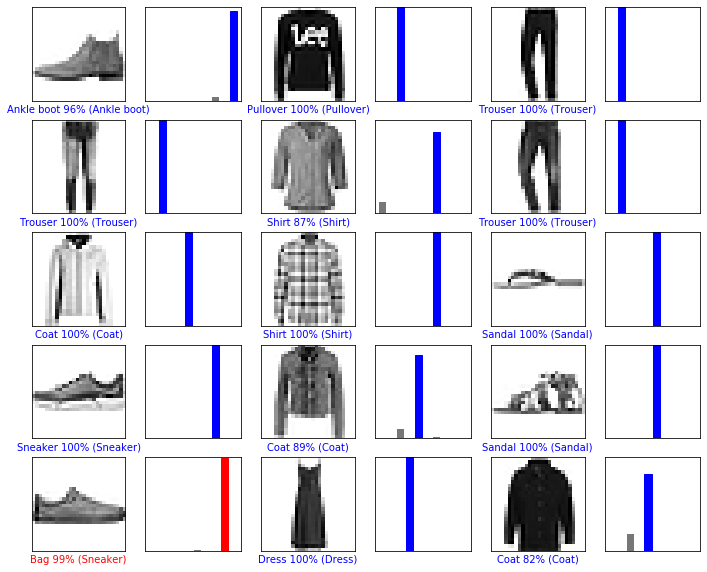

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [0]:
index = 0
test_image = test_images[index]
print(test_image.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

[[4.1182419e-11 6.5083721e-14 3.9688759e-11 1.8729621e-12 2.0693075e-13
  5.1235642e-05 5.2062315e-08 4.4544954e-02 6.4616580e-07 9.5540309e-01]]


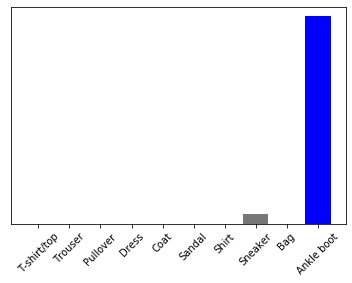

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

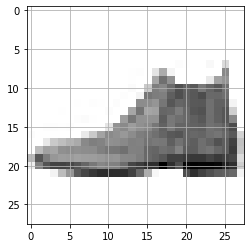

In [0]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [0]:
np.argmax(predictions_single[0])

9

In [0]:
test_labels[index]

9

# Hw2 Example of Underfitting

Build the Model

In [0]:
# set up the model to underfit with too many layers that are unable to learn enough patterns

model_u = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_u.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model_u.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 1.4105 - acc: 0.4489 - val_loss: 0.7028 - val_acc: 0.7301
Epoch 2/20
60000/60000 [==============================] - 5s 80us/sample - loss: 1.1698 - acc: 0.5233 - val_loss: 0.6509 - val_acc: 0.7736
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 1.1233 - acc: 0.5452 - val_loss: 0.6427 - val_acc: 0.7674
Epoch 4/20
60000/60000 [==============================] - 5s 81us/sample - loss: 1.0912 - acc: 0.5583 - val_loss: 0.6206 - val_acc: 0.7402
Epoch 5/20
60000/60000 [==============================] - 5s 78us/sample - loss: 1.0706 - acc: 0.5667 - val_loss: 0.6105 - val_acc: 0.7955
Epoch 6/20
60000/60000 [==============================] - 5s 78us/sample - loss: 1.0646 - acc: 0.5667 - val_loss: 0.5902 - val_acc: 0.7908
Epoch 7/20
60000/60000 [==============================] - 5s 79us/sample - loss: 1.0512 - acc: 0.5741 - val_loss: 0.

Evaluate Accuracy

In [0]:
test_loss, test_acc = model_u.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc) # high test loss and unreliable predictions

10000/10000 [==============================] - 0s 34us/sample - loss: 0.5564 - acc: 0.8209
Test accuracy: 0.8209


Training and Test Loss Graph

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

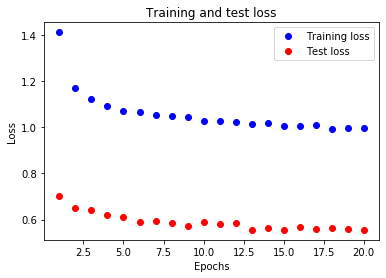

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and Test Accuracy Graph

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

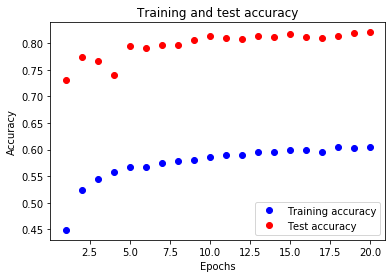

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Hw2 Example of Overfitting

Building the Model

In [0]:
# set up the modified to overfit with few layers and some size variaiton

model_o = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_o.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model_o.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4728 - acc: 0.8317 - val_loss: 0.4426 - val_acc: 0.8365
Epoch 2/20
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3571 - acc: 0.8690 - val_loss: 0.3865 - val_acc: 0.8632
Epoch 3/20
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3222 - acc: 0.8817 - val_loss: 0.4010 - val_acc: 0.8590
Epoch 4/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2987 - acc: 0.8894 - val_loss: 0.3803 - val_acc: 0.8635
Epoch 5/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2793 - acc: 0.8960 - val_loss: 0.3392 - val_acc: 0.8781
Epoch 6/20
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2641 - acc: 0.9004 - val_loss: 0.3464 - val_acc: 0.8792
Epoch 7/20
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2526 - acc: 0.9039 - val_l

Evaluate Accuracy

In [0]:
test_loss, test_acc = model_o.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc) # low test loss and unreliable predictions

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3920 - acc: 0.8881
Test accuracy: 0.8881


Training and Test Loss Graph

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

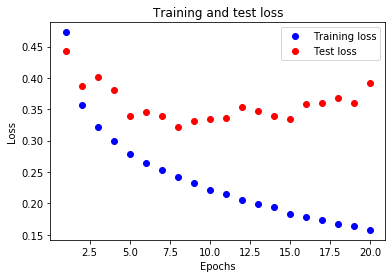

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and Test Accuracy Graph

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

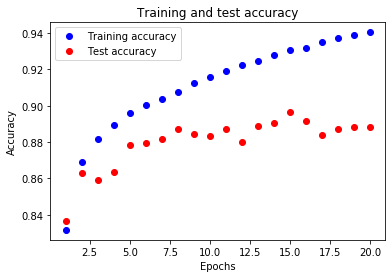

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Hw2 Example of Good Fit

Build the Model

In [0]:
# set up the modified to fit well with dropout

model_g = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dropout(0.51),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_g.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model_g.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6236 - acc: 0.7794 - val_loss: 0.4440 - val_acc: 0.8336
Epoch 2/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4744 - acc: 0.8280 - val_loss: 0.4143 - val_acc: 0.8506
Epoch 3/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4449 - acc: 0.8368 - val_loss: 0.3920 - val_acc: 0.8588
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4248 - acc: 0.8461 - val_loss: 0.4021 - val_acc: 0.8542
Epoch 5/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4106 - acc: 0.8486 - val_loss: 0.3841 - val_acc: 0.8625
Epoch 6/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4008 - acc: 0.8523 - val_loss: 0.3724 - val_acc: 0.8676
Epoch 7/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3950 - acc: 0.8559 - val_loss: 0.

Evaluate Accuracy

In [0]:
test_loss, test_acc = model_g.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc) # low test loss and unreliable predictions

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3521 - acc: 0.8774
Test accuracy: 0.8774


Training and Test Loss

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

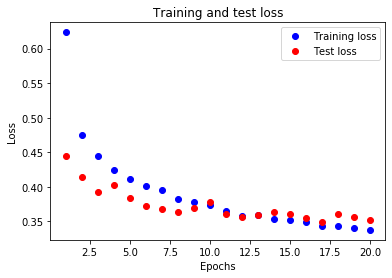

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

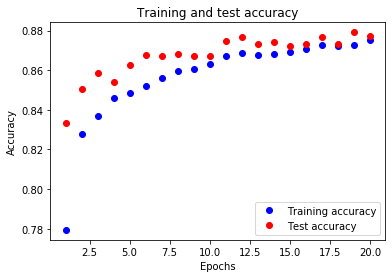

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()